In [1]:
import os
import pandas as pd
import random

# Agrupamiento

In [2]:
dc = pd.read_csv('AMD_clustering_0.csv')

for d in dc:
    dc = dc[dc[d].notna()]

dc.info()
dc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820518 entries, 0 to 3820517
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   SS      float64
 1   ST      float64
 2   CH      float64
 3   ML      float64
 4   fC      float64
dtypes: float64(5)
memory usage: 174.9 MB


,SS,ST,CH,ML,fC
0,0.83550,0.467500,0.004328,0.034988,0.291824
1,0.82925,0.443889,0.004874,0.036527,0.289788
2,0.83225,0.445000,0.003185,0.037753,0.295944
3,0.82075,0.434722,0.003215,0.041143,0.287854
4,0.82125,0.436944,0.003215,0.041143,0.288577


In [3]:
data = dc[['SS', 'ST', 'CH', 'ML']]

data_norm = (data-data.min())/(data.max()-data.min())
data_sample = data_norm.sample(frac=0.01)
data_sample.head()

,SS,ST,CH,ML
2855783,0.914557,0.753419,0.004809,0.000000
1140739,0.879616,0.637136,0.001369,0.017868
606812,0.916645,0.561009,0.002588,0.080666
3110600,0.876993,0.866621,0.000948,0.013380
699690,0.932486,0.734938,0.000671,0.044515


In [4]:
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sb

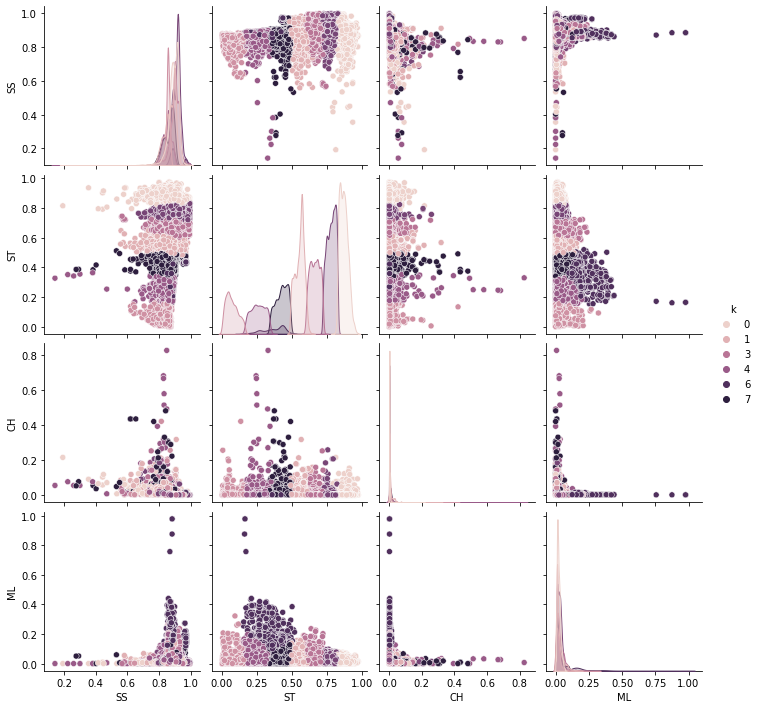

In [5]:
from sklearn.cluster import KMeans

model = KMeans()
out = data_sample.copy()
out['k'] = model.fit_predict(out)

sb.pairplot(out, hue='k')

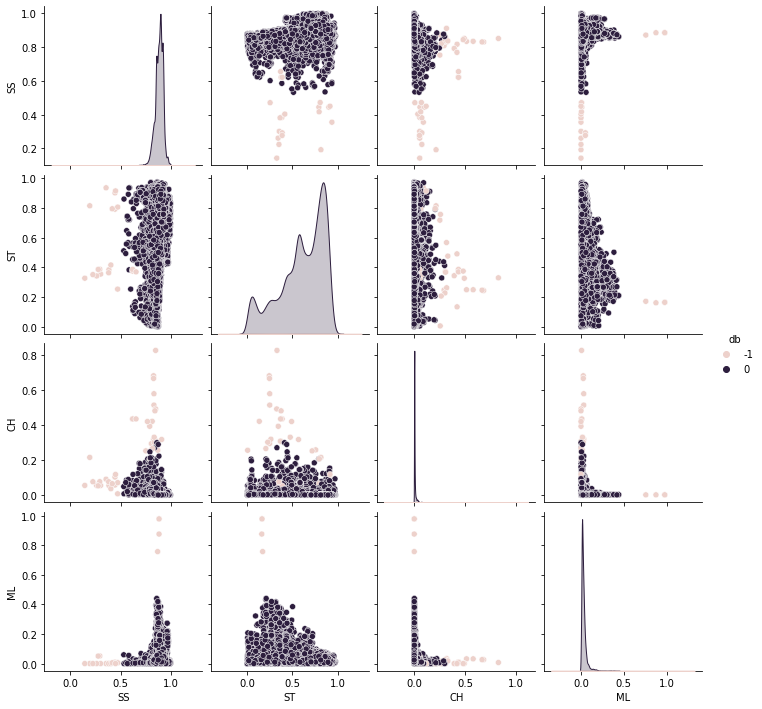

In [7]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1, min_samples=10)
out = data_sample.copy()
out['db'] = model.fit_predict(out.to_numpy())

sb.pairplot(out, hue='db')

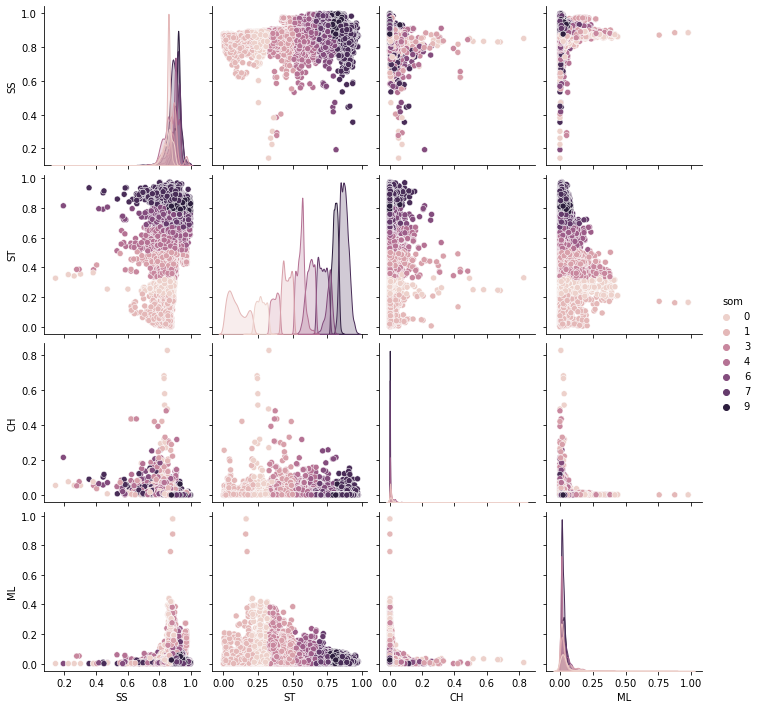

In [11]:
!pip install sklearn_som
from sklearn_som.som import SOM

model = SOM(m=5, n=2, dim=len(data_sample.columns))
out = data_sample.copy()
out['som'] = model.fit_predict(out.to_numpy())

sb.pairplot(out, hue='som')

# Regresión

In [12]:
df = pd.read_csv('AMD_regression_0.csv')

for d in df:
    df = df[df[d].notna()]

df = df.sample(frac=0.005)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19103 entries, 985206 to 770894
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SS      19103 non-null  float64
 1   ST      19103 non-null  float64
 2   CH      19103 non-null  float64
 3   ML      19103 non-null  float64
 4   SL      19103 non-null  float64
 5   LA      19103 non-null  float64
 6   DA      19103 non-null  float64
 7   CL      19103 non-null  float64
 8   fC      19103 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


,SS,ST,CH,ML,SL,LA,DA,CL,fC
985206,0.860100,0.813944,0.001318,0.028802,0.090408,0.455650,0.431155,0.213234,0.440480
1695376,0.911825,0.832917,0.002109,0.045523,0.499188,0.500233,0.412061,0.000001,0.406252
1163612,0.872200,0.811111,0.000513,0.027132,0.334531,0.609672,0.301102,0.028174,0.332627
2905683,0.906750,0.730389,0.004462,0.021417,0.007555,0.654833,0.604006,0.586591,0.337558
3632910,0.884525,0.859639,0.001223,0.048123,0.367929,0.466122,0.649470,0.017758,0.361209


In [13]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [14]:
x = df[['SS', 'ST', 'CH', 'ML', 'SL', 'LA', 'DA', 'CL']]
y = df['fC']

seed = random.randint(0, 10000000)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [15]:
estimate = RandomForestClassifier(max_depth=4, random_state=seed)
estimate.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5007743)

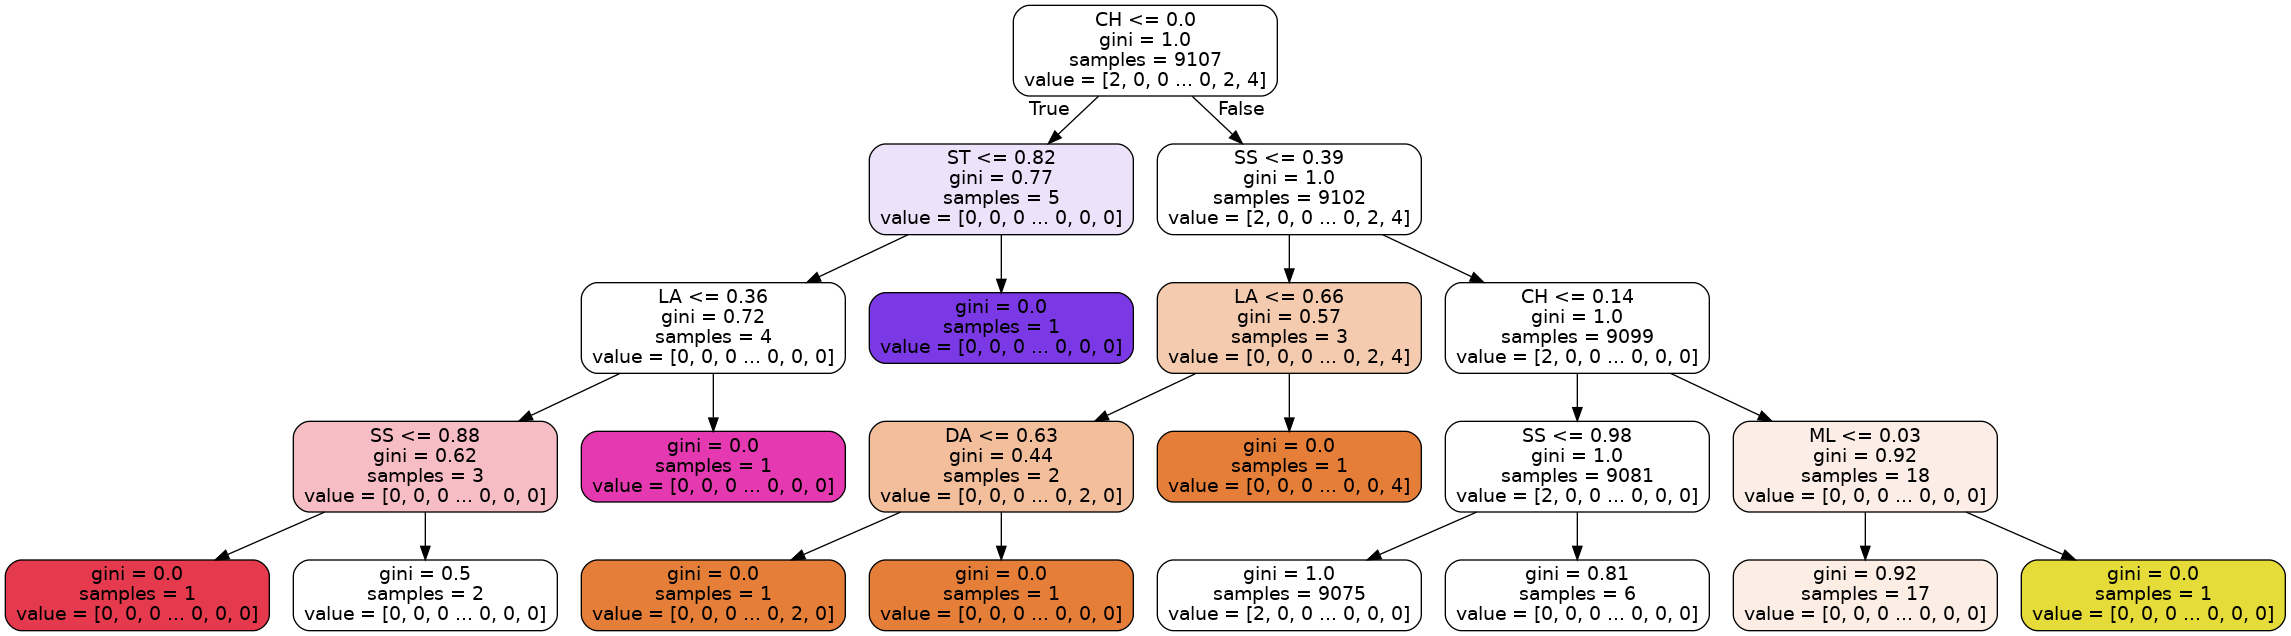

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(estimate.estimators_[0], 
                out_file='tree.dot', 
                feature_names=['SS', 'ST', 'CH', 'ML', 'SL', 'LA', 'DA', 'CL'],
                rounded=True, proportion = False, 
                precision=2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

In [17]:
print(estimate.score(x_test, y_test))
y_predict = estimate.predict(x_test)

print(y_predict[:10])
print(y_test[:10])

0.00020938023450586265
[5216 5216 6903  521 5216 5216 5216 5216 5216 5216]
[2186 3827 3772  180 1730 3158 2472 1156  197  642]


In [19]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1,), random_state=seed)
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(1,), random_state=5007743)

In [20]:
print(clf.score(x_test, y_test))
y_predict = clf.predict(x_test)

print(y_test[:10])
print(y_predict[:10])

0.0
[2186 3827 3772  180 1730 3158 2472 1156  197  642]
[5216 5216 5216 5216 5216 5216 5216 5216 5216 5216]
